Tujuan dari project ini adalah untuk mengklasifikasikan jenis beras Jasmin dan Gonen.

##**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
%matplotlib inline

##**Load Dataset**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/hasanasyarie/Data/main/riceClassification.csv')
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


##**Eksploratory Data Analysis**

In [ ]:
# Melihat informasi pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [ ]:
# Melihat dimensi data
df.shape

(18185, 12)

Terdapat 18185 baris dan 11 kolom

###Melihat Kondisi Data Target

In [ ]:
df.Class.value_counts()

1    9985
0    8200
Name: Class, dtype: int64

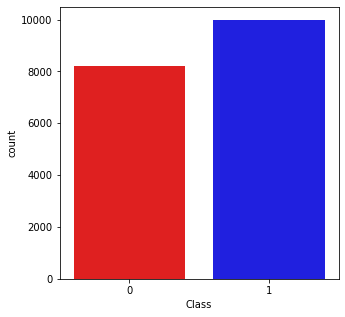

In [ ]:
#Melihat keseimbangan data menggunakan diagram batang
plt.figure(figsize=(5,5))
colors = ['Red','Blue']
sns.countplot(x='Class', data=df, palette=colors)
plt.show()

Dari gambar di atas jelas bahwa kelas-kelas pada target (Class) cukup untuk dikatakan seimbang sehingga tidak perlu dilakukan sampling.

###Mengecek Missing Value

In [ ]:
df.isna().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

<Axes: >

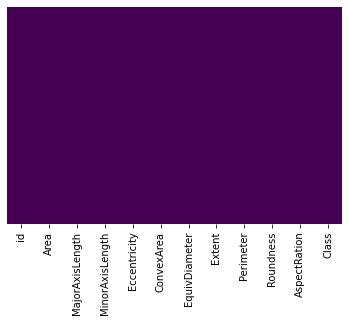

In [ ]:
#Menyajikan visualisasi data
sns.heatmap(df.isnull(), cbar = False, yticklabels = False, cmap = 'viridis')

Bisa kita lihat bahwa pada dataset tersebut tidak memiliki data kosong

###Mengecek Outlier

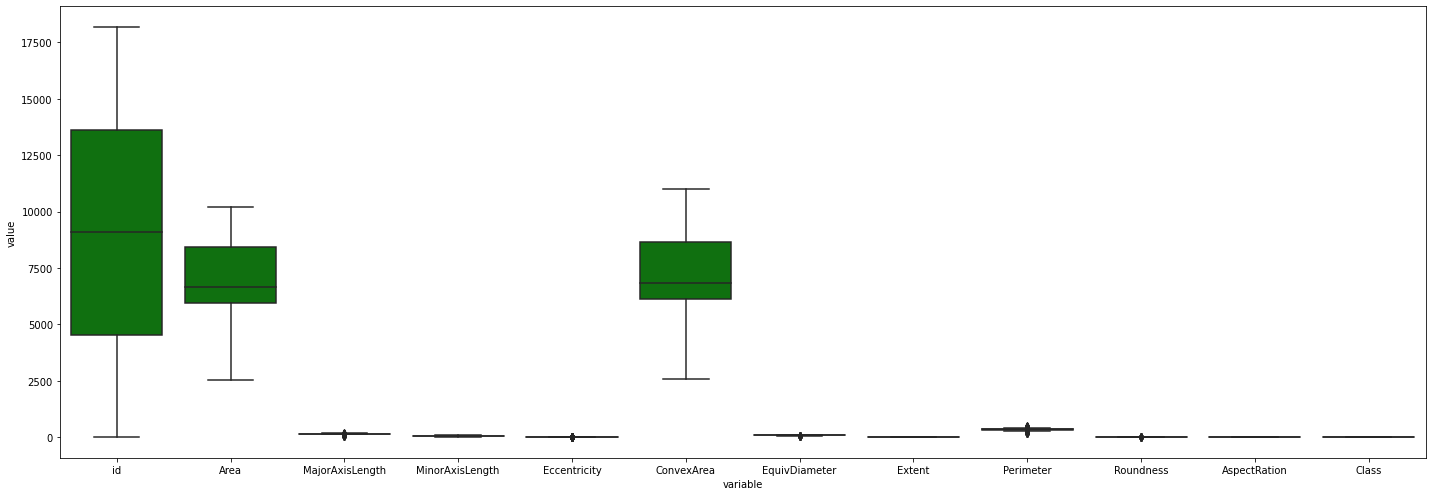

In [ ]:
fig = plt.figure(figsize = (20,7))
sns.boxplot(x = 'variable', y = 'value', color = 'green', orient = 'v', data = pd.melt(df))
plt.tight_layout()

Outliers adalah data yang menyimpang terlalu jauh dari data yang lainnya dalam suatu rangkaian data (pencilan). Adanya data outliers ini akan membuat analisis terhadap serangkaian data menjadi bias, atau tidak mencerminkan fenomena yang sebenarnya. <br>
Pada gambar diatas terlihat bahwa terdapat outlier di kolom MajorAxisLenght, Eccentriciy, EquivDiameter, Perimeter, dan Roundness.

###Melihat Korelasi Data

In [ ]:
k = len(df.columns)
cm = df.corr()

<Axes: title={'center': 'Korelasi Data'}>

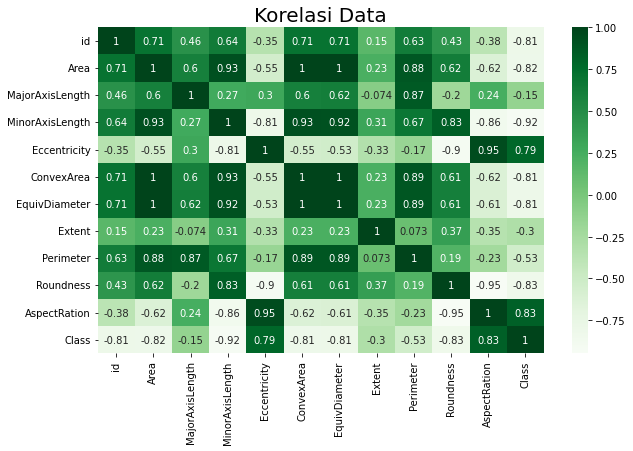

In [ ]:
#Menyajikan Visualisasi Data
plt.figure(figsize=(10,6))
plt.title('Korelasi Data', size = 20)
sns.heatmap(cm, annot=True, cmap = 'Greens')

Analisis korelasi menjelaskan ada atau tidaknya hubungan antar dua variabel. Nilai Korelasi bisa positif atau negatif atau lemah. Korelasi positif yang artinya jika penambahan pada nilai X maka bertambah juga nilai Y. Korelasi negatif menjelaskan hubungan setiap kenaikan nilai X maka ada penurunan pada nilai Y. Korelasi yang lemah menjelaskan dua variabel ini tidak ada hubungannya sama sekali. <br>

Pada heatmap diatas kita dapat melihat bahwa pada fitur MinorAxisLength, AspectRation, Roundness, Area, ConvexArea, EquivDiameter, dan Eccentricity memiliki korelasi yang sangat tinggi dengan variabel target (Class). Dan sebagian besar fitur memiliki nilai korelasi negatif dengan data target (Class).

###Melihat Statistik Data

In [ ]:
df.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


##**Preprocesing Data**

###Drop Irrelevant Columns

Karena terdapat kolom yang tidak diperlukan, maka dari itu kita hapus terlebih dahulu kolom yang tidak diperlukan tersebut.

In [ ]:
df = df.drop(columns = ['id'])
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


###Drop Outlier

Pendekatan Inter Quartile Range untuk menemukan outlier adalah pendekatan yang paling umum digunakan dan paling dipercaya digunakan dalam bidang penelitian.

IQR adalah ukuran penyebaran statistik dan dihitung sebagai perbedaan antara persentil ke-75 dan ke-25. Ini diwakili oleh rumus IQR = Q3 - Q1. Baris kode di bawah menghitung dan mencetak kisaran interkuartil untuk setiap variabel dalam dataset.

Teknik ini menggunakan skor IQR yang dihitung sebelumnya untuk menghilangkan pencilan. Aturan praktisnya adalah bahwa segala sesuatu yang tidak berada dalam kisaran (Q1 - 1.5 IQR) dan (Q3 + 1.5 IQR) adalah pencilan, dan dapat dihapus.

Metode ini dipakai karena untuk identifikasi outlier awal digunakan metode boxplot.

In [ ]:
#Menghitung Skor IQR
sorted(df)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Area               2461.000000
MajorAxisLength      14.380304
MinorAxisLength      18.763442
Eccentricity          0.049755
ConvexArea         2520.000000
EquivDiameter        16.432490
Extent                0.157135
Perimeter            39.013000
Roundness             0.118318
AspectRation          0.755574
Class                 1.000000
dtype: float64


In [ ]:
#Menghapus Outlier
df_clear = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis = 1)]
df_clear.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
158,6374,129.576759,63.762307,0.870549,6476,90.086785,0.662234,314.656,0.809003,2.032184,1
186,6946,136.303603,65.738475,0.876009,7115,94.042128,0.594437,338.782,0.760508,2.073422,1
207,5786,125.555431,59.626250,0.880040,5945,85.831020,0.623491,307.304,0.769931,2.105707,1
218,5896,127.013995,59.843292,0.882050,6092,86.643063,0.610352,309.264,0.774655,2.122443,1
227,6082,129.098407,60.416315,0.883736,6204,87.999107,0.661375,308.106,0.805111,2.136814,1


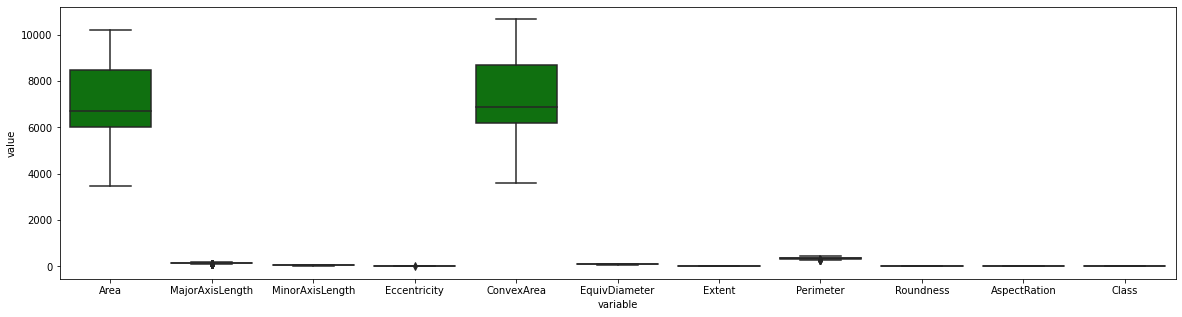

In [ ]:
#Melihat outlier setelah dihapus
fig = plt.figure(figsize = (20,5))
sns.boxplot(x = "variable", y = "value", color = 'green', orient = 'v', data = pd.melt(df_clear))
plt.show()

Outlier berhasil dihapus

###Normalisasi Data

In [ ]:
#Normalisasi data dengan MinMaxScaler
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_clear), columns = df_clear.columns)

df_norm.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.430269,0.097220,0.606403,0.355124,0.408680,0.496008,0.554774,0.253430,0.880472,0.135892,1.0
1,0.515224,0.216869,0.647801,0.391715,0.499010,0.579313,0.419962,0.409696,0.752963,0.154850,1.0
2,0.342938,0.025694,0.519757,0.418728,0.333616,0.406376,0.477736,0.205810,0.777739,0.169692,1.0
3,0.359275,0.051637,0.524304,0.432202,0.354396,0.423479,0.451608,0.218505,0.790161,0.177386,1.0
4,0.386900,0.088712,0.536308,0.443496,0.370229,0.452039,0.553065,0.211005,0.870241,0.183992,1.0


###Split Dataset

In [ ]:
# Menentukan variabel independent dan dependent
y = df_norm['Class']
X = df_norm.drop(columns=['Class'])

#Mengubah data menjadi array
y = np.array(y)
X = np.array(X)

Selanjutnya membagi data training dan data testing dengan perbandingan 80:20

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print('Jumlah data traing adalah:',len(X_train))
print('Jumlah data testing adalah:',len(X_test))

Jumlah data traing adalah: 14085
Jumlah data testing adalah: 3522


##**Modelling**

###**Klasifikasi menggunakan metode SVM**

In [ ]:
svm = SVC(random_state=0)
svm.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1653
         1.0       0.99      0.99      0.99      1869

    accuracy                           0.99      3522
   macro avg       0.99      0.99      0.99      3522
weighted avg       0.99      0.99      0.99      3522



In [ ]:
print("Akurasi Training: {:.2f}%".format(svm.score(X_train, y_train)*100))
print("Akurasi Testing: {:.2f}%".format(svm.score(X_test, y_test)*100))

Akurasi Training: 99.04%
Akurasi Testing: 99.12%


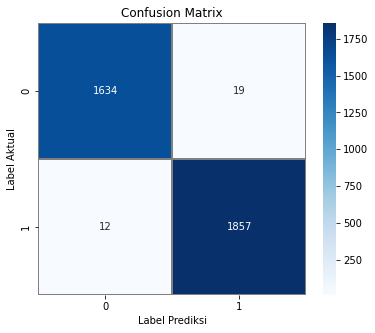

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)  

f, ax = plt.subplots(figsize=(6, 5))      
sns.heatmap(cm,                  
            annot=True, 
            linewidths=0.01,    
            cmap="Blues",                
            linecolor="gray",     
            fmt='.0f',                 
            ax=ax)
plt.xlabel("Label Prediksi")          
plt.ylabel("Label Aktual")          
plt.title("Confusion Matrix")        
plt.show()    

###**Klasifikasi menggunakan metode Naive Bayes**

In [ ]:
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = NB.predict(X_test)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1653
         1.0       0.98      1.00      0.99      1869

    accuracy                           0.99      3522
   macro avg       0.99      0.99      0.99      3522
weighted avg       0.99      0.99      0.99      3522



In [ ]:
print("Akurasi Training: {:.2f}%".format(NB.score(X_train, y_train)*100))
print("Akurasi Testing: {:.2f}%".format(NB.score(X_test, y_test)*100))

Akurasi Training: 98.75%
Akurasi Testing: 98.86%


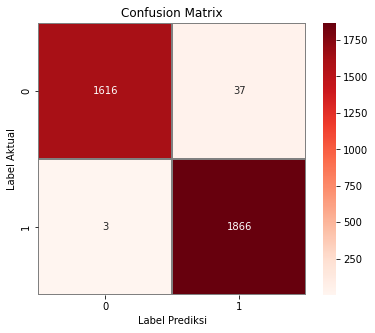

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_nb)  

f, ax = plt.subplots(figsize=(6, 5))      
sns.heatmap(cm,                  
            annot=True, 
            linewidths=0.01,    
            cmap="Reds",                
            linecolor="gray",     
            fmt='.0f',                 
            ax=ax)
plt.xlabel("Label Prediksi")          
plt.ylabel("Label Aktual")          
plt.title("Confusion Matrix")        
plt.show()    

##**Kesimpulan**

Klasifikasi jenis beras berhasil dimplementasikan menggunakan metode Machine Learning, metode yang digunakan adalah Support Vector Machine yang dikomparasikan dengan metode Naive Bayes. Dari kedua metode tersebut memperoleh hasil yang cukup baik


*   Metode Support Vector Machine menghasilkan akurasi sebesar 99.12% pada data testing
*   Metode Naive Bayes menghasilkan akurasi sebesar 98.86% pada data testing

Dari hasil tersebut dapat dikatakan bahwa metode SVM lebih baik dibandingkan metode Naive bayes dalam klasifikasi jenis beras.
